<a href="https://colab.research.google.com/github/teaminii/MachineLearning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
##### Data Generation 
X =list(range(10))         # x = [i for i in range(10)]
Y = [1,1,2,4,5,7,8,9,9,10]

print(len(Y))
print(len(X))

10
10


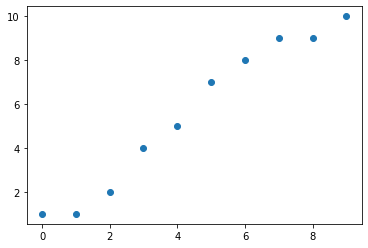

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)

In [24]:
class H():
  def __init__(self,w):  #클래스 내부에 있는 함수 #method의 첫번째 인자는 self를 써주고 시작한다. 매서드 w로 input을 받는다. 
    self.w = w

  def forward(self, x):
    return self.w * x   #다른 메서드에서도 w를 쓰기 위해 self.w 사용 

def cost(h, X, Y) :
  error = 0
  for i in range(len(X)):
    error += (h.forward(X[i])-Y[i])**2
  error = error / len(X)
  return error

h = H(4)
print(h.w)
print(h.forward(4))
cost(h,X,Y)

4
16


222.2

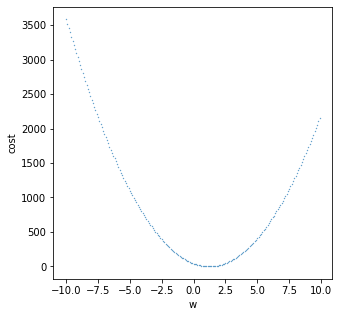

In [37]:
list_w = []
list_c = []

for i in range(-100, 100):
  w = i * 0.1
  h = H(w)
  c = cost(h,X,Y)
  list_w.append(w)
  list_c.append(c)


plt.figure(figsize=(5,5))
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w,list_c, s=0.1)  #list_w, list_c 의 len 값이 동일해야 error가 발생하지 않는다. 

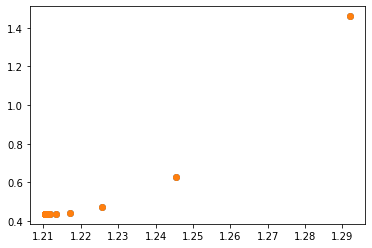

In [74]:
def cal_grad(w, cost): 
    h = H(w)
    cost1 = cost(h, X, Y)
    eps = 0.00001 
    h = H(w+eps) 
    cost2 = cost(h, X, Y)
    dcost = cost2 - cost1
    dw = eps
    grad = dcost / dw
    return grad, (cost1+cost2)*0.5

def cal_grad2(w, cost): 
    h = H(w)
    grad = 0
    for i in range(len(X)):
        grad += 2*(h.forward(X[i]) - Y[i]) * X[i]
    grad = grad / len(X)
    c = cost(h, X, Y)
    return grad, c


# w = 4
# lr = 0.01
# print(cal_grad(4,cost))

# for i in range(10):
#   # w -= lr*cal_grad(w,cost)    #w= w + lr * (-cal_grad(w,cost))
#   # print(w)

#   grad, mean_cost = cal_grad(w,cost)
#   w -= lr*grad
#   print(w, mean_cost)



w1 = 1.4
w2 = 1.4
lr = 0.01

list_w1 = []
list_w2 = []
list_c1 = []
list_c2 = []

for i in range(100):
  grad, mean_cost = cal_grad(w1,cost)
  grad2, mean_cost2 = cal_grad2(w2,cost)


  w1 -= lr*grad
  w2 -= lr*grad2
  list_w1.append(w1)
  list_w2.append(w2)
  list_c1.append(mean_cost)
  list_c2.append(mean_cost2)
  #print(w1, mean_cost, w2, mean_cost2)

plt.scatter(list_w1,list_c1)
plt.scatter(list_w2,list_c2)